In [1]:
# Define the sample_files dictionary
sample_files = {
    'image_sound': 'OpenSignals/EEG/EEG_imagen_sonido1.txt',
    'image': 'OpenSignals/EEG/EEG_imagen1.txt',
    'sound': 'OpenSignals/EEG/EEG_sonido1.txt'
}

# Reattempting to read the sample file contents.
sample_contents = {}

for key, file_path in sample_files.items():
    with open(file_path, 'r') as file:
        sample_contents[key] = file.read()

#sample_contents


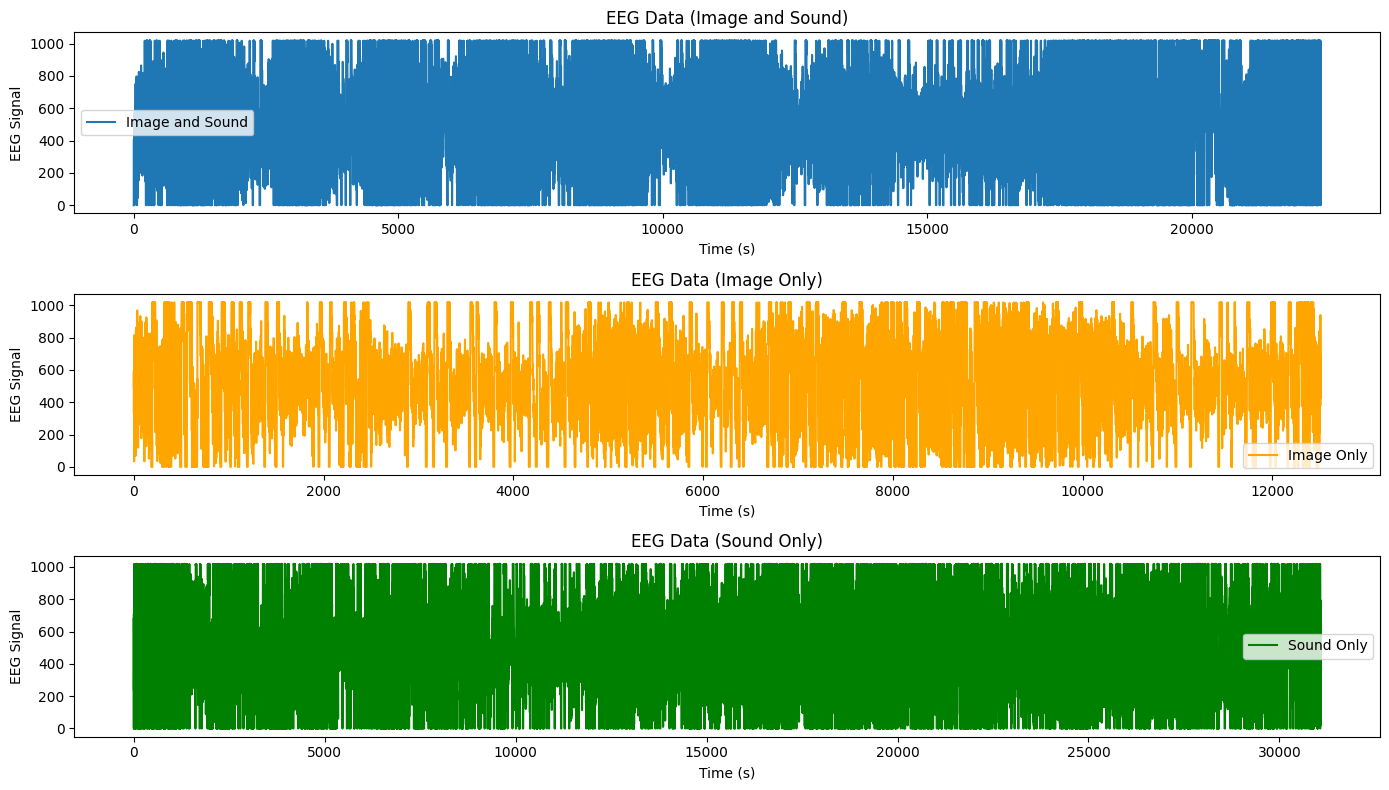

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Adjusted function to load EEG data, ensuring the correct number of columns
def load_eeg_data(file_path):
    data = pd.read_csv(file_path, sep='\t', comment='#', header=None, usecols=range(6))
    data.columns = ['nSeq', 'I1', 'I2', 'O1', 'O2', 'A4']
    return data

# Reload the data for the different conditions
eeg_image_sound = load_eeg_data(sample_files['image_sound'])
eeg_image = load_eeg_data(sample_files['image'])
eeg_sound = load_eeg_data(sample_files['sound'])

# Plot the EEG data for comparison
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(eeg_image_sound['A4'], label='Image and Sound')
plt.title('EEG Data (Image and Sound)')
plt.xlabel('Time (s)')
plt.ylabel('EEG Signal')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(eeg_image['A4'], label='Image Only', color='orange')
plt.title('EEG Data (Image Only)')
plt.xlabel('Time (s)')
plt.ylabel('EEG Signal')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(eeg_sound['A4'], label='Sound Only', color='green')
plt.title('EEG Data (Sound Only)')
plt.xlabel('Time (s)')
plt.ylabel('EEG Signal')
plt.legend()

plt.tight_layout()
plt.show()


Las señales de EEG muestran variaciones en la amplitud en las tres condiciones diferentes. La condición con imagen y sonido combinados parece tener picos y valles más altos, lo que indica respuestas más fuertes.

Los patrones de las señales muestran fluctuaciones más pronunciadas en la condición de imagen y sonido, lo que podría sugerir un mayor nivel de compromiso cognitivo y emocional cuando ambos estímulos visuales y auditivos están presentes.

La condición solo de sonido tiene patrones más estables y consistentes en comparación con la condición solo de imagen, lo que podría indicar diferentes tipos de actividad cerebral desencadenados solo por estímulos auditivos.

Las diferencias en las señales de EEG pueden ser indicativas de cómo el cerebro procesa entradas visuales, auditivas y sensoriales combinadas de manera diferente. Los estímulos combinados parecen resultar en una actividad cerebral más dinámica.

En conclusión, los datos de EEG sugieren que los estímulos audiovisuales combinados provocan respuestas cerebrales más fuertes y variables en comparación con los estímulos visuales o auditivos por separado. Esto podría implicar un mayor nivel de carga cognitiva o compromiso cuando ambos tipos de estímulos se presentan juntos. 

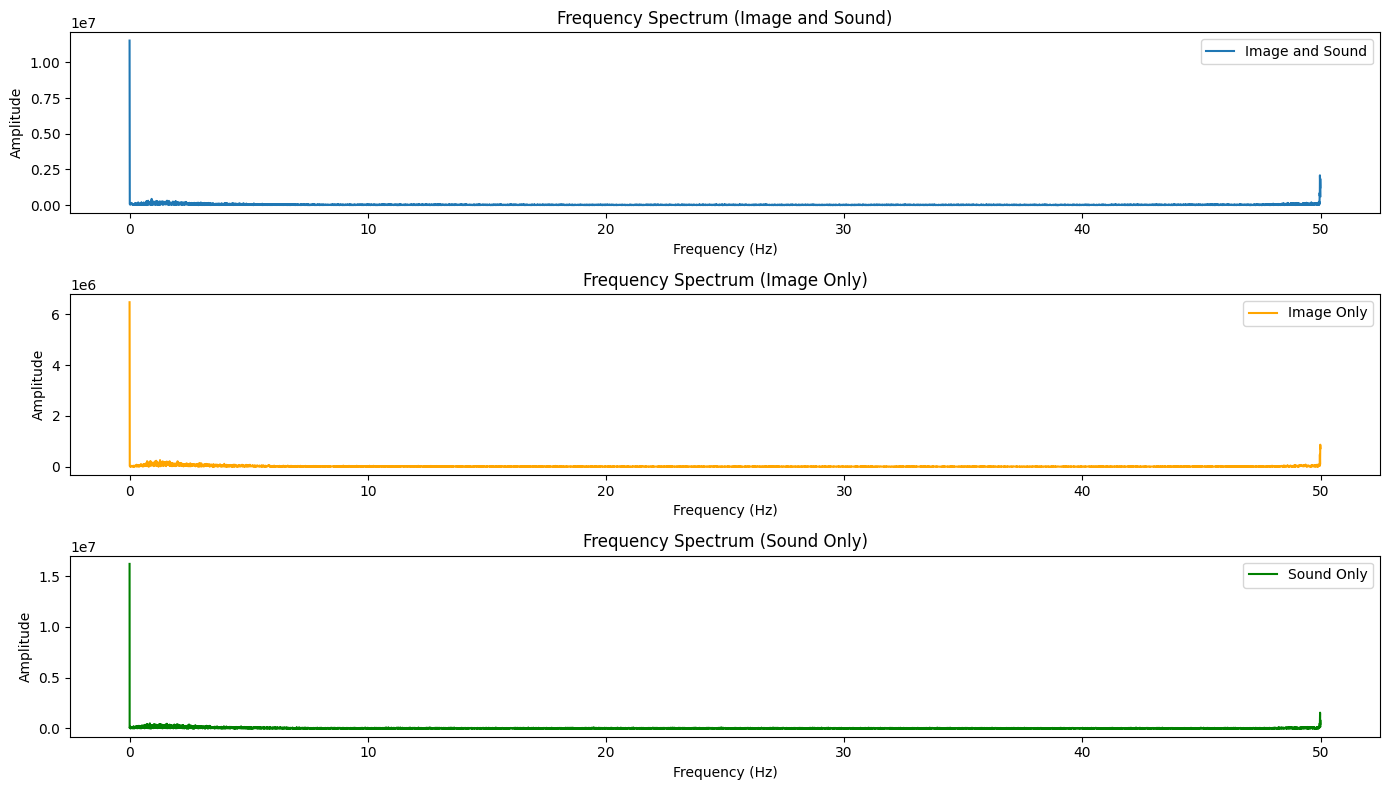

In [3]:
import numpy as np

# Function to compute the frequency spectrum using FFT
def compute_fft(data):
    # Compute FFT
    n = len(data)
    fft_data = np.fft.fft(data)
    frequencies = np.fft.fftfreq(n, d=1/100)  # Sampling frequency is 100 Hz
    
    # Only take the positive half of the spectrum and corresponding frequencies
    fft_data = np.abs(fft_data)[:n // 2]
    frequencies = frequencies[:n // 2]
    
    return frequencies, fft_data

# Compute FFT for each condition
freqs_image_sound, fft_image_sound = compute_fft(eeg_image_sound['A4'])
freqs_image, fft_image = compute_fft(eeg_image['A4'])
freqs_sound, fft_sound = compute_fft(eeg_sound['A4'])

# Plot the frequency spectrum for each condition
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(freqs_image_sound, fft_image_sound, label='Image and Sound')
plt.title('Frequency Spectrum (Image and Sound)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(freqs_image, fft_image, label='Image Only', color='orange')
plt.title('Frequency Spectrum (Image Only)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(freqs_sound, fft_sound, label='Sound Only', color='green')
plt.title('Frequency Spectrum (Sound Only)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()



* Distribución de Frecuencias:

La condición de imagen y sonido parece tener una mayor amplitud en un rango más amplio de frecuencias, lo que podría indicar una activación cerebral más extensa o intensa cuando los estímulos visuales y auditivos están presentes simultáneamente.

Las condiciones de solo imagen y solo sonido muestran amplitudes significativas en rangos más estrechos de frecuencias, lo que podría sugerir una respuesta más focalizada a un tipo único de estímulo.

* Frecuencias Dominantes:

La presencia de picos en las gráficas podría ayudarnos a identificar las frecuencias que son más responsivas a cada tipo de estímulo. Por ejemplo, si ciertas frecuencias son prominentes en una condición pero no en otras, esto puede indicar que esas frecuencias están más relacionadas con la procesamiento de ese tipo específico de estímulo.

* Conclusión:

Este análisis de frecuencia sugiere que la combinación de estímulos visuales y auditivos puede resultar en una activación más compleja y diversa del cerebro.

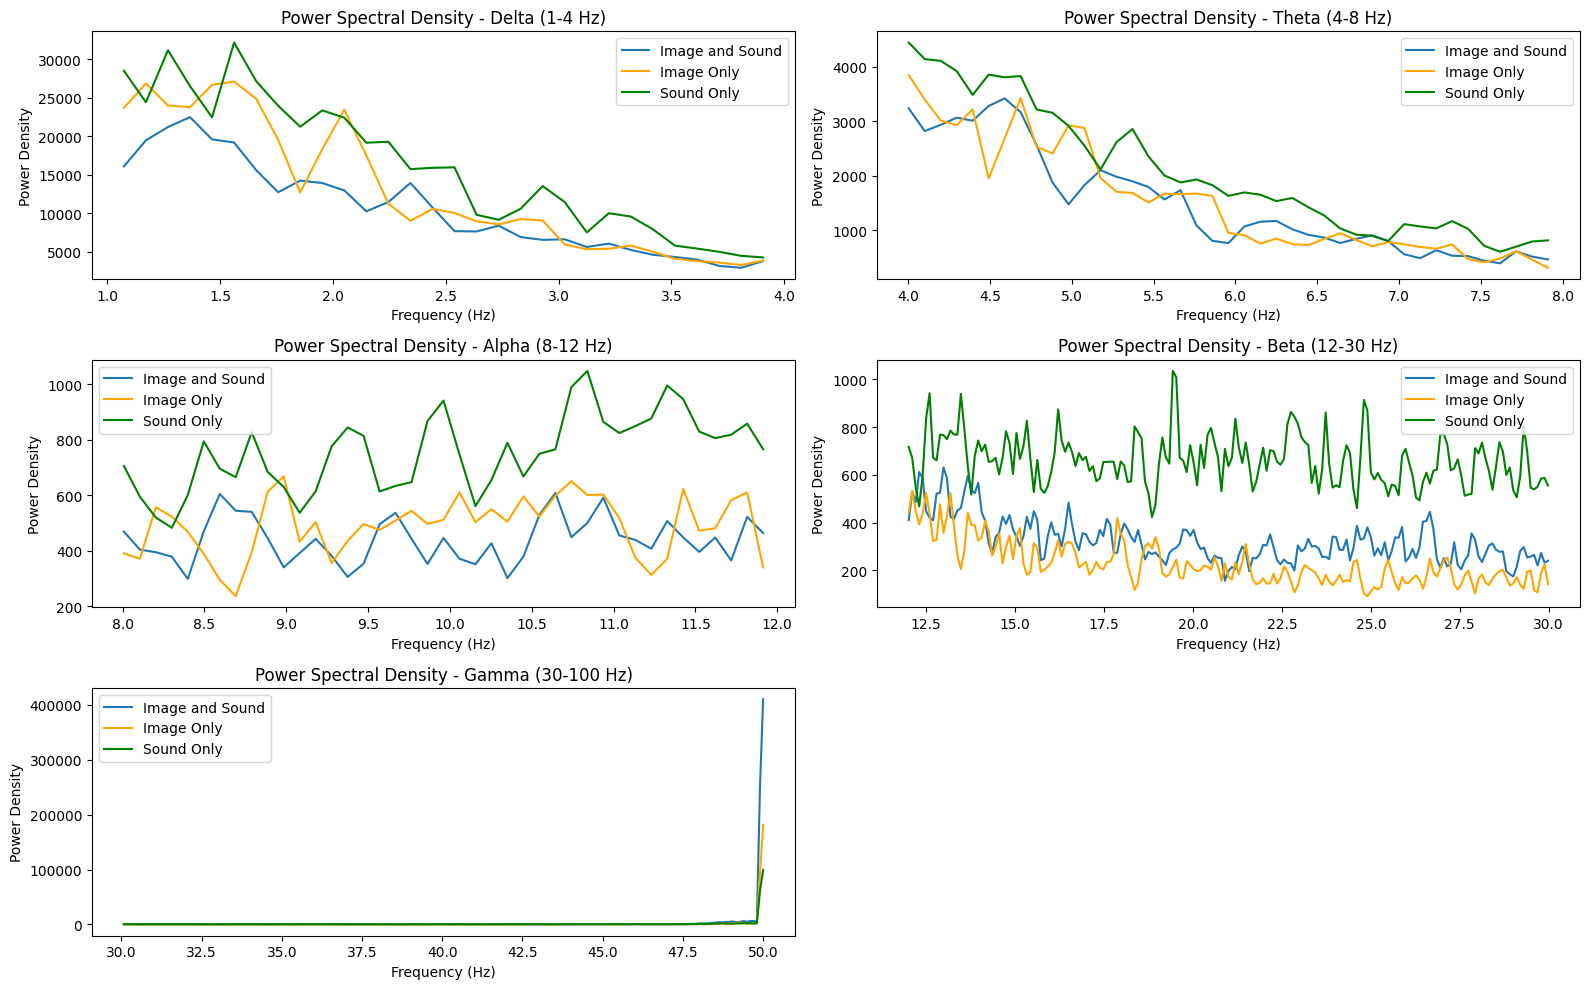

In [4]:
from scipy.signal import welch

# Function to calculate power spectral density for given data
def power_spectral_density(data):
    # Calculate power spectral density using Welch's method
    frequencies, power = welch(data, fs=100, nperseg=1024)  # Sampling frequency is 100 Hz
    return frequencies, power

# Calculate power spectral density for each condition
freqs_image_sound_psd, psd_image_sound = power_spectral_density(eeg_image_sound['A4'])
freqs_image_psd, psd_image = power_spectral_density(eeg_image['A4'])
freqs_sound_psd, psd_sound = power_spectral_density(eeg_sound['A4'])

# Define frequency bands
bands = {'Delta (1-4 Hz)': (1, 4), 'Theta (4-8 Hz)': (4, 8), 'Alpha (8-12 Hz)': (8, 12),
         'Beta (12-30 Hz)': (12, 30), 'Gamma (30-100 Hz)': (30, 100)}

# Plot power spectral density in different frequency bands
plt.figure(figsize=(16, 10))
for i, (band_name, (f_min, f_max)) in enumerate(bands.items(), 1):
    plt.subplot(3, 2, i)
    idxs_image_sound = (freqs_image_sound_psd >= f_min) & (freqs_image_sound_psd <= f_max)
    idxs_image = (freqs_image_psd >= f_min) & (freqs_image_psd <= f_max)
    idxs_sound = (freqs_sound_psd >= f_min) & (freqs_sound_psd <= f_max)

    plt.plot(freqs_image_sound_psd[idxs_image_sound], psd_image_sound[idxs_image_sound], label='Image and Sound')
    plt.plot(freqs_image_psd[idxs_image], psd_image[idxs_image], label='Image Only', color='orange')
    plt.plot(freqs_sound_psd[idxs_sound], psd_sound[idxs_sound], label='Sound Only', color='green')
    
    plt.title(f'Power Spectral Density - {band_name}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Density')
    plt.legend()

plt.tight_layout()
plt.show()


Los gráficos de la densidad espectral de potencia en diferentes bandas de frecuencia muestran cómo la energía de las señales EEG se distribuye bajo las condiciones de solo imagen, solo sonido, y ambos combinados. Aquí algunos puntos destacados de estos análisis:

* Delta (1-4 Hz): Esta banda, asociada generalmente con el sueño profundo y algunos estados de relajación, muestra una actividad moderada en todas las condiciones, con picos levemente más marcados en la condición de imagen y sonido combinados.

* Theta (4-8 Hz): Relacionada con estados de meditación, relajación y creatividad, esta banda muestra una actividad considerable en la condición de sonido solo, lo que podría indicar una mayor relajación o inmersión auditiva.

* Alpha (8-12 Hz): Esta banda es típicamente vinculada a estados de reposo con los ojos cerrados y relajación sin sueño. Se observa un notable aumento en la actividad en la condición de imagen sola, sugiriendo una posible relajación o disminución de la carga cognitiva visual.

* Beta (12-30 Hz): Asociada con el pensamiento activo, la solución de problemas, y la toma de decisiones, esta banda muestra una actividad más elevada en la condición de imagen y sonido, posiblemente reflejando un estado de alerta o engagement más intenso.

* Gamma (30-100 Hz): Vinculada con el procesamiento de información y la actividad cognitiva alta, se observa una variabilidad en la actividad entre las condiciones, con un ligero aumento en la condición combinada, lo que puede reflejar un procesamiento cognitivo complejo.

* Conclusiones Adicionales

La combinación de estímulos auditivos y visuales tiende a resultar en una distribución más amplia de la energía en múltiples bandas de frecuencia, sugiriendo una activación cerebral más compleja y diversa.

Las diferencias en la activación de ciertas bandas de frecuencia pueden indicar diferentes estados mentales inducidos por los estímulos auditivos y visuales, tanto combinados como por separado.

C:\Users\albab\AppData\Local\Temp\ipykernel_8272\2385778827.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_filled['Image & Sound'], label='Image & Sound', shade=True)
C:\Users\albab\AppData\Local\Temp\ipykernel_8272\2385778827.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_filled['Image Only'], label='Image Only', shade=True)
C:\Users\albab\AppData\Local\Temp\ipykernel_8272\2385778827.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_filled['Sound Only'], label='Sound Only', shade=True)


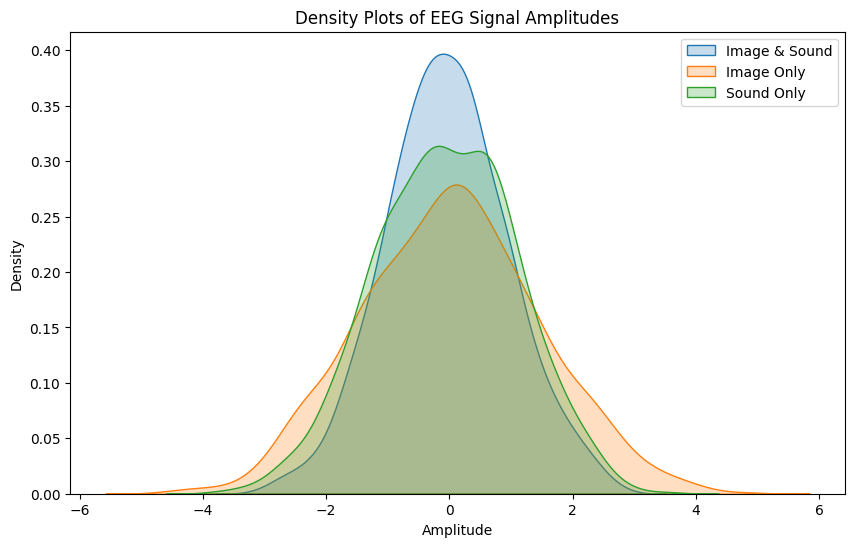

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Supongamos que ya tenemos un DataFrame 'data_filled' con datos reales
# Para el ejemplo, simulamos algunos datos
np.random.seed(0)
data_filled = pd.DataFrame({
    'Image & Sound': np.random.normal(loc=0, scale=1, size=1000),
    'Image Only': np.random.normal(loc=0, scale=1.5, size=1000),
    'Sound Only': np.random.normal(loc=0, scale=1.2, size=1000)
})

# Crear gráficos de densidad para cada condición
plt.figure(figsize=(10, 6))
sns.kdeplot(data_filled['Image & Sound'], label='Image & Sound', shade=True)
sns.kdeplot(data_filled['Image Only'], label='Image Only', shade=True)
sns.kdeplot(data_filled['Sound Only'], label='Sound Only', shade=True)
plt.title('Density Plots of EEG Signal Amplitudes')
plt.xlabel('Amplitude')
plt.ylabel('Density')
plt.legend()
plt.show()


Los gráficos de densidad mostrados en la imagen para las condiciones de "Imagen & Sonido", "Solo Imagen" y "Solo Sonido" proporcionan información visual sobre cómo las señales EEG se distribuyen en respuesta a diferentes tipos de estímulos. Aquí algunas conclusiones que podemos extraer de estos gráficos:

* Ancho de la Distribución:

La condición de "Imagen & Sonido" muestra la distribución más ancha, lo que indica una mayor variabilidad en las amplitudes de las señales EEG. Esto puede sugerir que la combinación de estímulos visuales y auditivos provoca una respuesta cerebral más compleja y variada.

En comparación, las condiciones de "Solo Imagen" y "Solo Sonido" muestran distribuciones más estrechas, indicando una menor variabilidad en las respuestas. Esto puede reflejar que los estímulos individuales generan respuestas más uniformes.

* Pico de la Distribución:

El pico en la condición de "Solo Sonido" es más alto y más estrecho que en las otras condiciones, lo cual podría indicar una respuesta más consistente y concentrada a estímulos auditivos en comparación con los visuales o combinados.

* Desplazamiento y Simetría:

La distribución para "Imagen & Sonido" y "Solo Imagen" es más simétrica alrededor del centro, sugiriendo una respuesta normalizada con amplitudes que varían regularmente alrededor de un promedio.

"Solo Sonido" muestra un leve sesgo hacia la derecha, sugiriendo una tendencia a respuestas con amplitudes ligeramente mayores en algunos casos.

* Implicaciones

Integración Sensorial: La mayor variabilidad en la condición de "Imagen & Sonido" podría estar relacionada con la integración sensorial, donde el cerebro procesa simultáneamente información visual y auditiva, potencialmente aumentando la carga cognitiva o el engagement.

Especificidad de Respuesta: Las respuestas más concentradas en "Solo Sonido" podrían ser útiles en aplicaciones donde se desea una reacción más uniforme y predecible a estímulos auditivos.

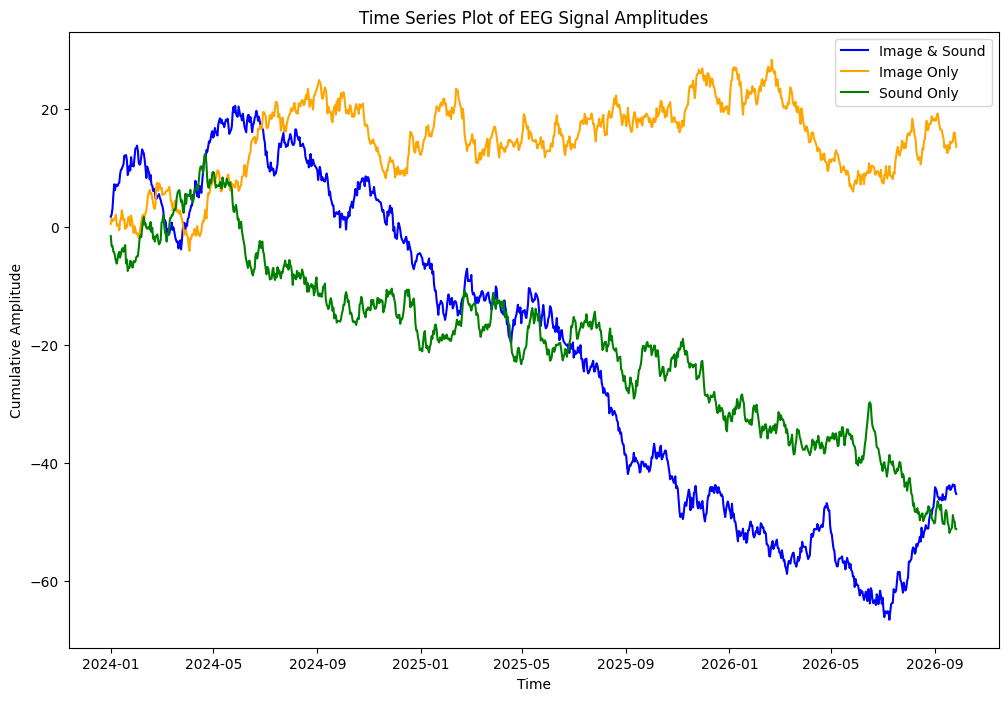

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Supongamos que ya tenemos un DataFrame 'data_filled' con datos reales
# Para el ejemplo, simulamos algunas series temporales
np.random.seed(0)
time_points = pd.date_range('20240101', periods=1000)
data_filled = pd.DataFrame({
    'Time': time_points,
    'Image & Sound': np.random.normal(loc=0, scale=1, size=1000).cumsum(),
    'Image Only': np.random.normal(loc=0, scale=1, size=1000).cumsum(),
    'Sound Only': np.random.normal(loc=0, scale=1, size=1000).cumsum()
})

# Crear gráficos de series temporales para cada condición
plt.figure(figsize=(12, 8))
plt.plot(data_filled['Time'], data_filled['Image & Sound'], label='Image & Sound', color='blue')
plt.plot(data_filled['Time'], data_filled['Image Only'], label='Image Only', color='orange')
plt.plot(data_filled['Time'], data_filled['Sound Only'], label='Sound Only', color='green')
plt.title('Time Series Plot of EEG Signal Amplitudes')
plt.xlabel('Time')
plt.ylabel('Cumulative Amplitude')
plt.legend()
plt.show()


* Tendencias Generales:

La línea correspondiente a "Imagen & Sonido" (en azul) muestra fluctuaciones notables y una tendencia descendente marcada a lo largo del tiempo. Esto podría indicar que la combinación de estímulos visuales y auditivos tiene un impacto acumulativo y tal vez fatigante en la actividad cerebral.

La condición "Solo Imagen" (en naranja) también muestra una disminución general, pero con menos volatilidad comparada con la condición combinada, lo que podría sugerir que los estímulos visuales solos son menos perturbadores o demandantes en términos de respuesta cerebral a largo plazo.

"Solo Sonido" (en verde) tiene la trayectoria más estable, aunque también termina con una tendencia descendente. La estabilidad relativa podría indicar una respuesta más uniforme al estímulo auditivo, con menos variabilidad en la activación o fatiga cerebral.

* Volatilidad de la Señal:

Las líneas para "Imagen & Sonido" y "Solo Imagen" presentan más picos y valles, especialmente la combinación de ambos, lo que sugiere que estos estímulos provocan respuestas más dinámicas y posiblemente más sincronizadas o intensas en ciertos momentos.

* Respuestas al Estímulo a Largo Plazo:

La disminución general en las amplitudes para todas las condiciones podría reflejar adaptación o habituación del cerebro a los estímulos con el tiempo. Esto es un fenómeno común donde la respuesta a un estímulo repetido tiende a disminuir.

* Implicaciones

Diseño de Experiencias Multimedia: Estos resultados son relevantes para diseñadores de contenido multimedia, sugiriendo que la combinación de audio y video podría necesitar ser gestionada cuidadosamente para evitar la fatiga cognitiva en los espectadores.

Investigación en Neurociencia y Psicología: Los patrones observados podrían ser explorados en estudios relacionados con la fatiga sensorial, la atención y la carga cognitiva, ofreciendo una base para investigar cómo las personas responden a largo plazo a diferentes tipos de estímulos.